In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pandas_profiling import profile_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\wineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.quality.value_counts()
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [4]:
pf=df.profile_report()
pf.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
X=df.drop(columns=['quality'])
y=df['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [6]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.20,random_state=100)

In [8]:
decision_tree=DecisionTreeClassifier()

In [9]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
sklearn.__version__

'1.1.1'

[Text(0.5058533031088083, 0.9666666666666667, 'X[10] <= 10.525\ngini = 0.648\nsamples = 914\nvalue = [6, 25, 381, 365, 121, 16]'),
 Text(0.28422927461139896, 0.9, 'X[9] <= 0.595\ngini = 0.545\nsamples = 547\nvalue = [5, 17, 319, 183, 21, 2]'),
 Text(0.11476683937823834, 0.8333333333333334, 'X[6] <= 98.5\ngini = 0.447\nsamples = 257\nvalue = [3, 11, 182, 57, 4, 0]'),
 Text(0.11062176165803109, 0.7666666666666667, 'X[9] <= 0.525\ngini = 0.49\nsamples = 224\nvalue = [3, 11, 149, 57, 4, 0]'),
 Text(0.043523316062176166, 0.7, 'X[0] <= 7.85\ngini = 0.369\nsamples = 91\nvalue = [1, 6, 71, 12, 1, 0]'),
 Text(0.02072538860103627, 0.6333333333333333, 'X[11] <= 1432.5\ngini = 0.194\nsamples = 48\nvalue = [1, 1, 43, 2, 1, 0]'),
 Text(0.012435233160621761, 0.5666666666666667, 'X[8] <= 3.665\ngini = 0.125\nsamples = 46\nvalue = [0, 1, 43, 1, 1, 0]'),
 Text(0.008290155440414507, 0.5, 'X[11] <= 9.5\ngini = 0.086\nsamples = 45\nvalue = [0, 0, 43, 1, 1, 0]'),
 Text(0.004145077720207254, 0.43333333333333

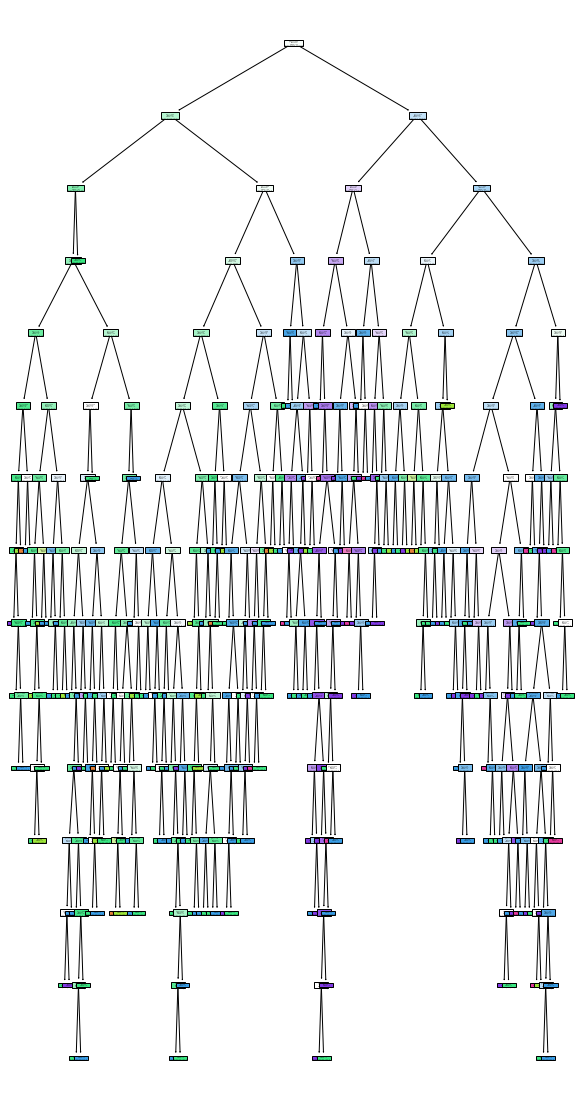

In [11]:
plt.figure(figsize=(10,20))
tree.plot_tree(decision_tree,filled=True)

In [98]:
# Taking 20 data set for practice you can take less also
df1=df
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [99]:
# dependent and independent columns
X1=df1.drop(columns=["quality"])
y1=df1['quality']

In [100]:
# Unique class
set(y1)

{3, 4, 5, 6, 7, 8}

In [101]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X1,y1)

DecisionTreeClassifier()

In [102]:
X1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [103]:
(0.076+0.075)/2

0.0755

In [104]:
l=X1["sulphates"]
(l[6]+l[7])/2

0.46499999999999997

In [105]:
y1

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

[Text(0.5183544124319419, 0.9722222222222222, 'alcohol <= 10.525\ngini = 0.641\nsamples = 1143\nvalue = [6, 33, 483, 462, 143, 16]\nclass = 5'),
 Text(0.30378005898366606, 0.9166666666666666, 'sulphates <= 0.585\ngini = 0.543\nsamples = 698\nvalue = [5, 21, 408, 235, 27, 2]\nclass = 5'),
 Text(0.11130331215970962, 0.8611111111111112, 'alcohol <= 9.75\ngini = 0.418\nsamples = 310\nvalue = [3, 11, 227, 65, 4, 0]\nclass = 5'),
 Text(0.05654491833030853, 0.8055555555555556, 'pH <= 3.545\ngini = 0.312\nsamples = 183\nvalue = [2, 8, 150, 22, 1, 0]\nclass = 5'),
 Text(0.05291515426497278, 0.75, 'alcohol <= 9.05\ngini = 0.292\nsamples = 180\nvalue = [2, 8, 150, 19, 1, 0]\nclass = 5'),
 Text(0.010889292196007259, 0.6944444444444444, 'fixed acidity <= 10.75\ngini = 0.667\nsamples = 9\nvalue = [1, 1, 4, 3, 0, 0]\nclass = 5'),
 Text(0.007259528130671506, 0.6388888888888888, 'residual sugar <= 1.65\ngini = 0.594\nsamples = 8\nvalue = [0, 1, 4, 3, 0, 0]\nclass = 5'),
 Text(0.003629764065335753, 0.58

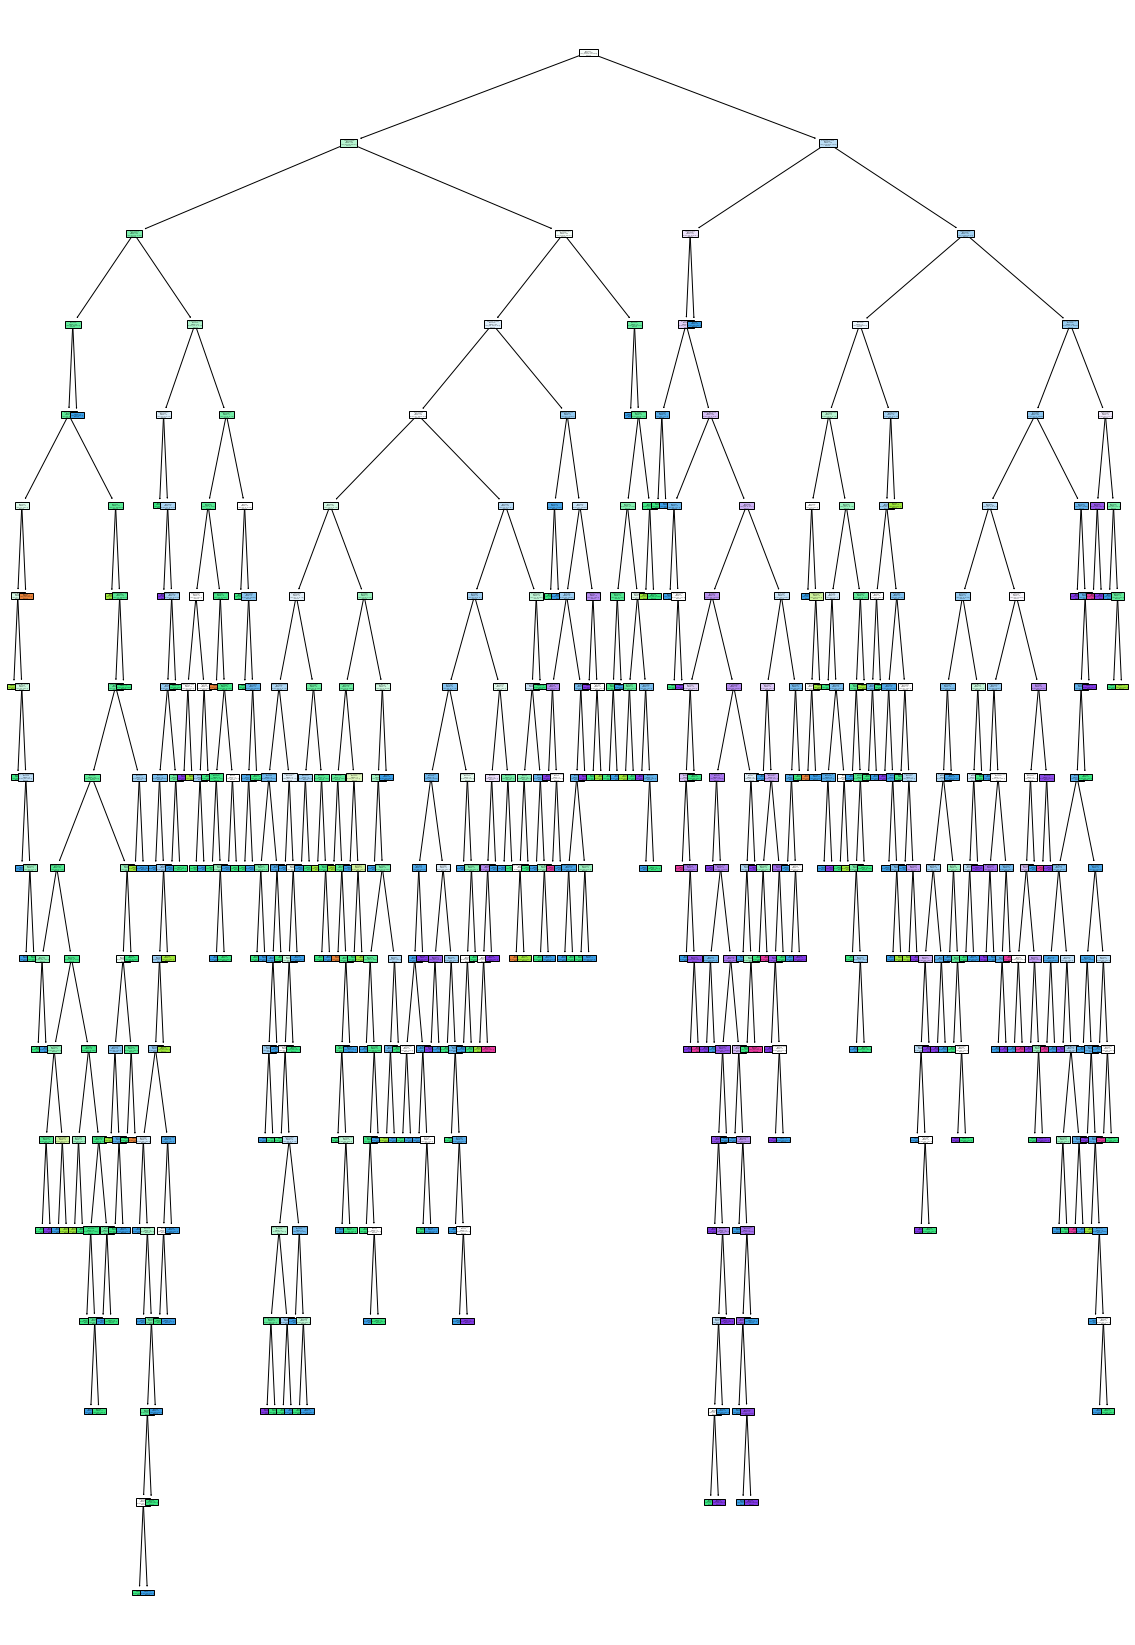

In [106]:
plt.figure(figsize=(20,30))
tree.plot_tree(dt_model,filled=True, class_names=[str(i) for i in set(y1)],feature_names=X1.columns)
# plt.savefig("Dt_model1")

* the first value indicates the column and the condition on which the root node was selected and further will be splitted
* the second value gives the gini impurity of the selected node
* samples gives the number of observations at that point of time present in the node
* value within the square brackets represents number of observations present in each class(output) i.e. in the above given figure, 1 observations are in class 1, 19 in class 2 , 6 in class 3 and 4 in the class 4.

Then the split was made on the basis of given condition

chlorides<=0.073 is selected by taking average of two values in this case ((l[4]+l[5])/2) i.e (0.076+0.075)/2=0.0755 or 0.076

In [107]:
dt_model.score(X1,y1)

1.0

In [108]:
dt_model.score(X_test,y_test)

1.0

In [109]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [110]:
# CCPP:- Cost Complexity Pruning Path
# Pruning means removing leaf nodes or restricting some branches
path=dt_model.cost_complexity_pruning_path(X1,y1)
ccp_alpha=path['ccp_alphas']

In [111]:
path

{'ccp_alphas': array([0.        , 0.00072908, 0.00076553, 0.00076553, 0.0007874 ,
        0.00081656, 0.00082343, 0.00082629, 0.00083115, 0.00083512,
        0.00083685, 0.00086202, 0.00087489, 0.00087489, 0.00087489,
        0.00087489, 0.00087489, 0.00087489, 0.00087489, 0.00087489,
        0.00087489, 0.00087489, 0.00087489, 0.00087489, 0.00087489,
        0.00099988, 0.00105542, 0.00109361, 0.00112486, 0.00113938,
        0.0011658 , 0.00116652, 0.00116652, 0.00116652, 0.00116652,
        0.00116652, 0.00116652, 0.00116652, 0.00116652, 0.00116652,
        0.00116652, 0.00116652, 0.00116652, 0.00116652, 0.00116652,
        0.00127591, 0.00131234, 0.00131234, 0.00131234, 0.00131988,
        0.00136725, 0.00137483, 0.00137483, 0.00138524, 0.00138524,
        0.00138524, 0.00139983, 0.00139983, 0.00139983, 0.0014026 ,
        0.0014139 , 0.0014217 , 0.00143732, 0.00145815, 0.00145815,
        0.00145815, 0.00145815, 0.00147659, 0.00149981, 0.00149981,
        0.00150398, 0.00153106, 0.

In [112]:
dt_model2=[]
for ccp in ccp_alpha:
    dt_m=DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X1,y1)
    dt_model2.append(dt_m)

In [113]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0007290755322251386),
 DecisionTreeClassifier(ccp_alpha=0.0007655293088363954),
 DecisionTreeClassifier(ccp_alpha=0.0007655293088363954),
 DecisionTreeClassifier(ccp_alpha=0.0007874015748031498),
 DecisionTreeClassifier(ccp_alpha=0.0008165645960921553),
 DecisionTreeClassifier(ccp_alpha=0.0008234264834542743),
 DecisionTreeClassifier(ccp_alpha=0.0008262856031884905),
 DecisionTreeClassifier(ccp_alpha=0.0008311461067366577),
 DecisionTreeClassifier(ccp_alpha=0.0008351228823669773),
 DecisionTreeClassifier(ccp_alpha=0.0008368519152497244),
 DecisionTreeClassifier(ccp_alpha=0.000862024599866194),
 DecisionTreeClassifier(ccp_alpha=0.0008748906386701663),
 DecisionTreeClassifier(ccp_alpha=0.0008748906386701663),
 DecisionTreeClassifier(ccp_alpha=0.0008748906386701663),
 DecisionTreeClassifier(ccp_alpha=0.0008748906386701663),
 DecisionTreeClassifier(ccp_alpha=0.0008748906386701663),
 DecisionTreeClassifier(ccp_alpha=0.0008748906

In [114]:
train_score=[i.score(X1,y1) for i in dt_model2]

In [115]:
test_score=[i.score(X_test,y_test) for i in dt_model2]

In [116]:
train_score

[1.0,
 0.9991251093613298,
 0.9973753280839895,
 0.9973753280839895,
 0.994750656167979,
 0.9938757655293088,
 0.9921259842519685,
 0.9921259842519685,
 0.9921259842519685,
 0.9886264216972879,
 0.9886264216972879,
 0.9877515310586177,
 0.9763779527559056,
 0.9763779527559056,
 0.9755030621172354,
 0.9763779527559056,
 0.9763779527559056,
 0.9772528433945756,
 0.9763779527559056,
 0.9763779527559056,
 0.9763779527559056,
 0.9763779527559056,
 0.9755030621172354,
 0.9755030621172354,
 0.9746281714785652,
 0.9746281714785652,
 0.9702537182852143,
 0.9702537182852143,
 0.968503937007874,
 0.9667541557305337,
 0.9658792650918635,
 0.9518810148731408,
 0.952755905511811,
 0.9536307961504812,
 0.9501312335958005,
 0.9553805774278216,
 0.9536307961504812,
 0.9536307961504812,
 0.9553805774278216,
 0.9510061242344707,
 0.9518810148731408,
 0.952755905511811,
 0.952755905511811,
 0.952755905511811,
 0.9510061242344707,
 0.9501312335958005,
 0.9440069991251093,
 0.94750656167979,
 0.949256342957

In [117]:
test_score

[1.0,
 0.9956331877729258,
 0.9912663755458515,
 0.9912663755458515,
 0.9912663755458515,
 0.9912663755458515,
 0.9868995633187773,
 0.982532751091703,
 0.982532751091703,
 0.982532751091703,
 0.9781659388646288,
 0.9737991266375546,
 0.9606986899563319,
 0.9650655021834061,
 0.9606986899563319,
 0.9650655021834061,
 0.9606986899563319,
 0.9650655021834061,
 0.9606986899563319,
 0.9606986899563319,
 0.9606986899563319,
 0.9606986899563319,
 0.9650655021834061,
 0.9650655021834061,
 0.9606986899563319,
 0.9650655021834061,
 0.9606986899563319,
 0.9606986899563319,
 0.9563318777292577,
 0.9563318777292577,
 0.9563318777292577,
 0.9432314410480349,
 0.9432314410480349,
 0.9475982532751092,
 0.9388646288209607,
 0.9519650655021834,
 0.9475982532751092,
 0.9475982532751092,
 0.9519650655021834,
 0.9432314410480349,
 0.9519650655021834,
 0.9475982532751092,
 0.9432314410480349,
 0.9519650655021834,
 0.9432314410480349,
 0.9432314410480349,
 0.9388646288209607,
 0.9432314410480349,
 0.9519650

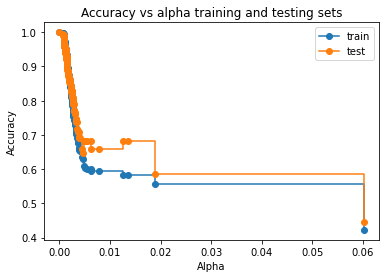

In [118]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs alpha training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",drawstyle="steps-post")
ax.legend()

In [119]:
dt_model_ccp=DecisionTreeClassifier(ccp_alpha=0.011,random_state=0)

In [120]:
dt_model_ccp.fit(X1,y1)

DecisionTreeClassifier(ccp_alpha=0.011, random_state=0)

[Text(0.5, 0.875, 'X[10] <= 10.525\ngini = 0.641\nsamples = 1143\nvalue = [6, 33, 483, 462, 143, 16]'),
 Text(0.25, 0.625, 'X[9] <= 0.585\ngini = 0.543\nsamples = 698\nvalue = [5, 21, 408, 235, 27, 2]'),
 Text(0.125, 0.375, 'gini = 0.418\nsamples = 310\nvalue = [3, 11, 227, 65, 4, 0]'),
 Text(0.375, 0.375, 'X[6] <= 81.5\ngini = 0.586\nsamples = 388\nvalue = [2, 10, 181, 170, 23, 2]'),
 Text(0.25, 0.125, 'gini = 0.589\nsamples = 325\nvalue = [2, 8, 130, 161, 22, 2]'),
 Text(0.5, 0.125, 'gini = 0.323\nsamples = 63\nvalue = [0, 2, 51, 9, 1, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.375\ngini = 0.642\nsamples = 445\nvalue = [1, 12, 75, 227, 116, 14]'),
 Text(0.625, 0.375, 'gini = 0.619\nsamples = 144\nvalue = [0, 0, 14, 55, 68, 7]'),
 Text(0.875, 0.375, 'gini = 0.605\nsamples = 301\nvalue = [1, 12, 61, 172, 48, 7]')]

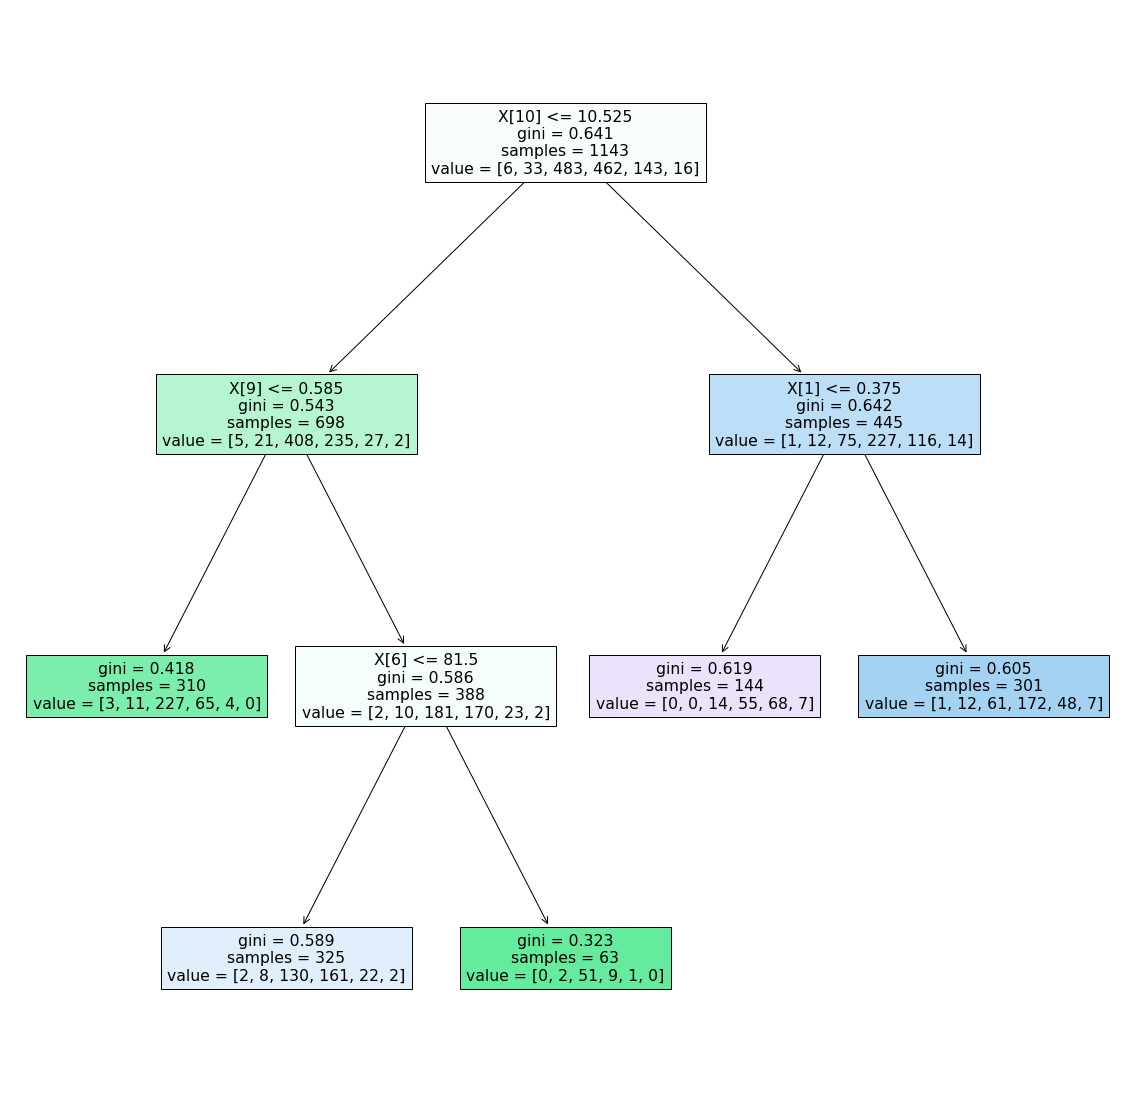

In [121]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [122]:
dt_model_ccp.score(X1,y1)

0.5940507436570429

In [123]:
dt_model_ccp.score(X_test,y_test)

0.6593886462882096

In [124]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [125]:
grid_parm={
    "criterion":['gini','entropy'],
    "splitter":['best','random'],
    "max_depth":range(1,40,1),
    "min_samples_split":range(2,10,1),
    "min_samples_leaf":range(1,10,1)
#     "ccp_alpha":np.random.rand(20)
}

In [126]:
grid_ccp=GridSearchCV(estimator=dt_model_ccp, param_grid=grid_parm, cv=15, n_jobs=4)

In [ ]:
grid_ccp.fit(X1,y1)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=15.
  warnings.warn(


In [ ]:
grid_ccp.best_params_

In [43]:
dt_model_cpp_new=DecisionTreeClassifier(ccp_alpha=0.01103,criterion="entropy", max_depth=7, min_samples_leaf=7, min_samples_split=2, splitter='random')

In [44]:
dt_model_cpp_new.fit(X1,y1)

DecisionTreeClassifier(ccp_alpha=0.01103, criterion='entropy', max_depth=7,
                       min_samples_leaf=7, splitter='random')

In [45]:
dt_model_cpp_new.score(X1,y1)

0.616

In [46]:
dt_model_cpp_new.score(X_test,y_test)

0.5633187772925764

In [47]:
pread=dt_model_cpp_new.predict(X_train)

In [48]:
confusion_matrix(y_train,pread)

array([[  0,   0,   5,   1,   0,   0],
       [  0,   0,  20,   5,   0,   0],
       [  0,   0, 227, 151,   3,   0],
       [  0,   0, 106, 251,   8,   0],
       [  0,   0,  16,  99,   6,   0],
       [  0,   0,   0,  15,   1,   0]], dtype=int64)

#### Why are we getting 0 in confusion metrices?? 
Ans: At the time of training we used X1 and y1 in that some class was not availabe so it is giving zeros

In [49]:
X=df.drop(columns=["quality"])

In [50]:
y=df.quality

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
# By default test_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [53]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100) 
# n_estimator is number of models in a bag in this case it is 10 DT

In [54]:
bag_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [55]:
bag_dt.predict(X_test)

array([5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5,
       5, 6, 5, 6, 6, 6, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 7, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       7, 5, 6, 7, 5, 6, 6, 7, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       5, 6, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 7, 5, 5, 5, 7, 6, 7, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 7, 6,
       5, 5, 6, 6, 5, 7, 6, 5, 6, 5, 6, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 6, 7, 5, 5, 5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 5, 5, 6,
       5, 5, 6, 6, 5, 7, 7, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 7, 5, 6, 6, 6, 7, 5, 5, 6, 7, 6,
       6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 7, 5, 7, 5, 5, 6, 7, 5],
      dtype=int64)

In [74]:
bag_dt.estimators_

[DecisionTreeClassifier(random_state=1729947290),
 DecisionTreeClassifier(random_state=1811742307),
 DecisionTreeClassifier(random_state=468644424),
 DecisionTreeClassifier(random_state=1854475951),
 DecisionTreeClassifier(random_state=756423706),
 DecisionTreeClassifier(random_state=2132279799),
 DecisionTreeClassifier(random_state=1741315113),
 DecisionTreeClassifier(random_state=1697365374),
 DecisionTreeClassifier(random_state=897411524),
 DecisionTreeClassifier(random_state=1246330210),
 DecisionTreeClassifier(random_state=1934024278),
 DecisionTreeClassifier(random_state=1776516421),
 DecisionTreeClassifier(random_state=105158226),
 DecisionTreeClassifier(random_state=1777291842),
 DecisionTreeClassifier(random_state=1425119285),
 DecisionTreeClassifier(random_state=2068606129),
 DecisionTreeClassifier(random_state=1535424154),
 DecisionTreeClassifier(random_state=207670260),
 DecisionTreeClassifier(random_state=163754916),
 DecisionTreeClassifier(random_state=859428659),
 Decisi

In [56]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [57]:
bag_dt.estimator_params

()

In [58]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [61]:
bag_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [62]:
bag_knn.predict(X_test)

array([6, 7, 5, 7, 5, 7, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6,
       5, 6, 5, 7, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6,
       6, 6, 6, 7, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 5, 6, 5, 7, 6, 5, 7, 6, 7, 7, 6, 6, 5, 6, 7, 6,
       6, 5, 5, 6, 5, 6, 7, 6, 5, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5,
       5, 5, 5, 6, 6, 6, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 7, 7, 5, 6, 6, 7, 7,
       6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 7,
       5, 5, 7, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6],
      dtype=int64)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier(n_estimators=5,verbose=1)

In [65]:
rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=5, verbose=1)

In [66]:
rf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.6083916083916084

In [67]:
bag_dt.score(X_test,y_test)

0.6538461538461539

In [68]:
bag_knn.score(X_test,y_test)

0.5

In [69]:
# It will give you number of trees created
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=2105263688),
 DecisionTreeClassifier(max_features='sqrt', random_state=898784021),
 DecisionTreeClassifier(max_features='sqrt', random_state=1609841789),
 DecisionTreeClassifier(max_features='sqrt', random_state=92249342),
 DecisionTreeClassifier(max_features='sqrt', random_state=1822510529)]

In [70]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=2105263688)

[Text(0.7058584515366431, 0.96875, 'X[6] <= 81.5\ngini = 0.642\nsamples = 529\nvalue = [4, 27, 360, 349, 103, 14]'),
 Text(0.4628398345153664, 0.90625, 'X[2] <= 0.295\ngini = 0.648\nsamples = 448\nvalue = [4, 25, 260, 331, 95, 14]'),
 Text(0.28708628841607564, 0.84375, 'X[9] <= 0.595\ngini = 0.611\nsamples = 253\nvalue = [2, 22, 179, 176, 25, 2]'),
 Text(0.17176418439716312, 0.78125, 'X[2] <= 0.195\ngini = 0.541\nsamples = 115\nvalue = [0, 15, 112, 54, 4, 0]'),
 Text(0.1449468085106383, 0.71875, 'X[11] <= 1343.0\ngini = 0.594\nsamples = 87\nvalue = [0, 13, 72, 52, 4, 0]'),
 Text(0.10549645390070922, 0.65625, 'X[4] <= 0.095\ngini = 0.615\nsamples = 72\nvalue = [0, 13, 56, 51, 4, 0]'),
 Text(0.050236406619385346, 0.59375, 'X[11] <= 95.5\ngini = 0.627\nsamples = 61\nvalue = [0, 13, 41, 49, 4, 0]'),
 Text(0.018912529550827423, 0.53125, 'X[2] <= 0.025\ngini = 0.32\nsamples = 11\nvalue = [0, 0, 13, 2, 1, 0]'),
 Text(0.014184397163120567, 0.46875, 'X[9] <= 0.575\ngini = 0.531\nsamples = 5\nva

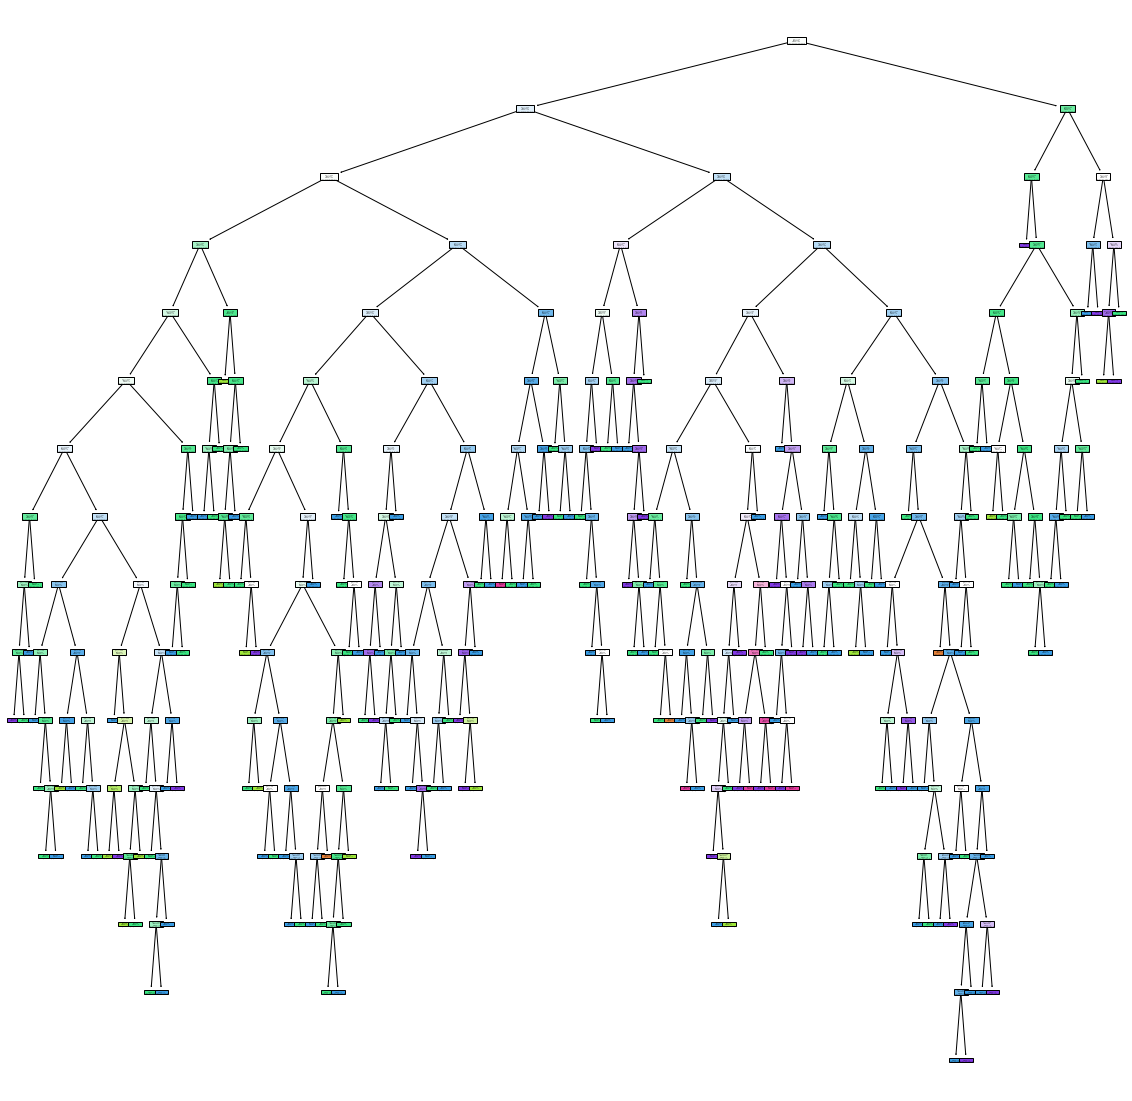

In [71]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(0.7058584515366431, 0.96875, 'X[6] <= 81.5\ngini = 0.642\nsamples = 529\nvalue = [4, 27, 360, 349, 103, 14]'),
 Text(0.4628398345153664, 0.90625, 'X[2] <= 0.295\ngini = 0.648\nsamples = 448\nvalue = [4, 25, 260, 331, 95, 14]'),
 Text(0.28708628841607564, 0.84375, 'X[9] <= 0.595\ngini = 0.611\nsamples = 253\nvalue = [2, 22, 179, 176, 25, 2]'),
 Text(0.17176418439716312, 0.78125, 'X[2] <= 0.195\ngini = 0.541\nsamples = 115\nvalue = [0, 15, 112, 54, 4, 0]'),
 Text(0.1449468085106383, 0.71875, 'X[11] <= 1343.0\ngini = 0.594\nsamples = 87\nvalue = [0, 13, 72, 52, 4, 0]'),
 Text(0.10549645390070922, 0.65625, 'X[4] <= 0.095\ngini = 0.615\nsamples = 72\nvalue = [0, 13, 56, 51, 4, 0]'),
 Text(0.050236406619385346, 0.59375, 'X[11] <= 95.5\ngini = 0.627\nsamples = 61\nvalue = [0, 13, 41, 49, 4, 0]'),
 Text(0.018912529550827423, 0.53125, 'X[2] <= 0.025\ngini = 0.32\nsamples = 11\nvalue = [0, 0, 13, 2, 1, 0]'),
 Text(0.014184397163120567, 0.46875, 'X[9] <= 0.575\ngini = 0.531\nsamples = 5\nva

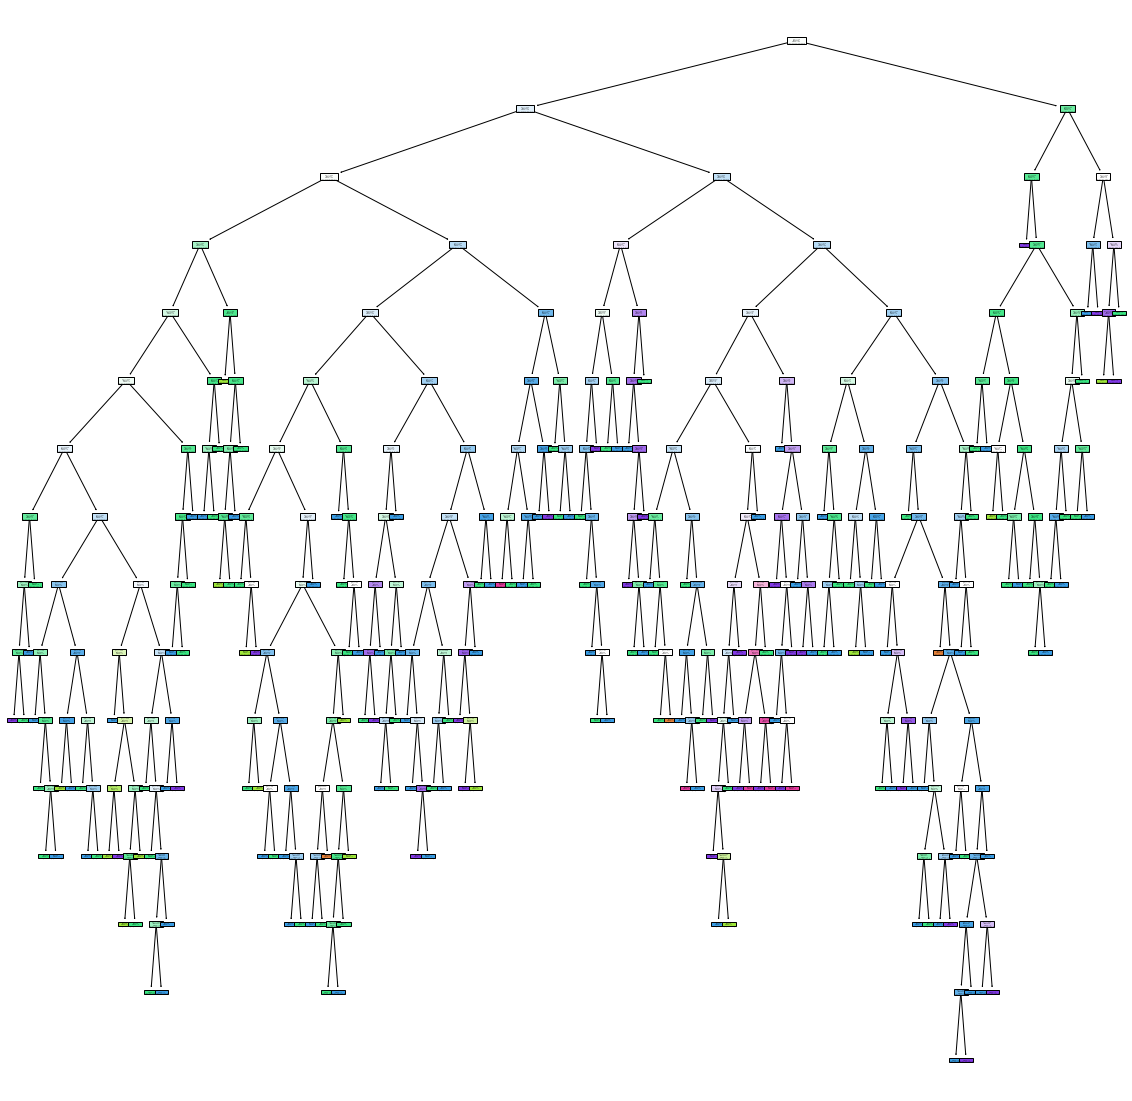

In [72]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

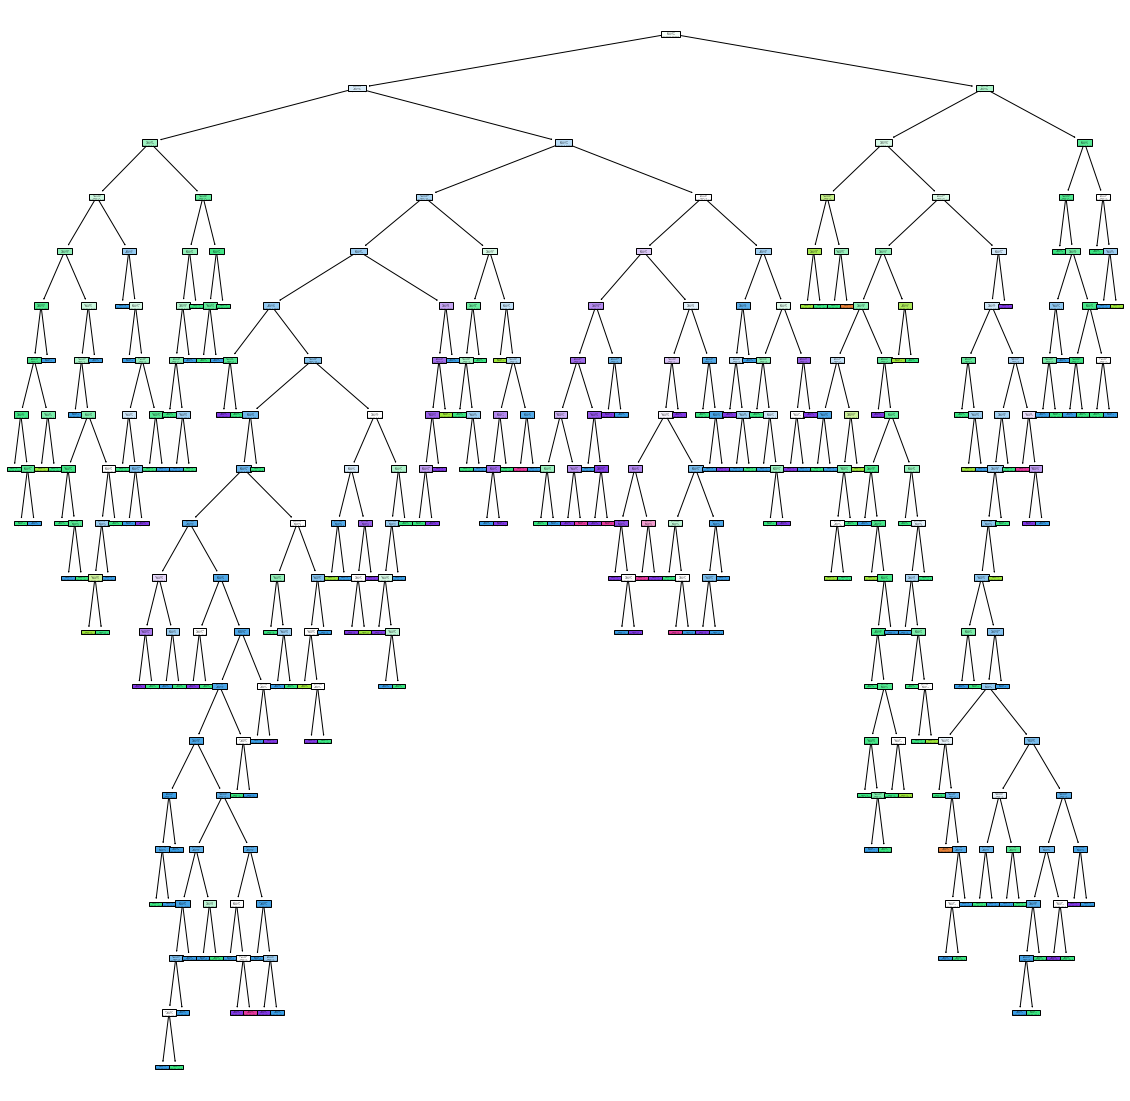

In [73]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i], filled=True)

In [79]:
gridparam={
    "n_estimators":[5,10,50,100,120,150,200],
    "criterion":['entropy','gini'],
    "max_depth":range(10),
    "min_samples_leaf":range(10)
}

In [80]:
rf=RandomForestClassifier(n_estimators=5)

In [83]:
grid_search_rf=GridSearchCV(estimator=rf,param_grid=gridparam,cv=10,n_jobs=4,verbose=1)

In [84]:
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 1400 candidates, totalling 14000 fits


C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2660 fits failed out of a total of 14000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Pa

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=4,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150, 200]},
             verbose=1)

In [85]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [86]:
rf_new=RandomForestClassifier(criterion="gini",max_depth=9,min_samples_leaf=1, n_estimators=100)

In [89]:
rf_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=9)

In [90]:
rf_new.score(X_test,y_test)

0.6643356643356644